In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import load_workbook

In [2]:
# Change figure plot size
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_columns', 15)

In [3]:
# Import CSV data
money = r'C:\Users\Chris\Documents\Python\Data Science Projects\6_Money_Completed\DataSource\Money.xlsx'

# Read Data
core = pd.read_excel(money).sort_values(by='Date', ascending=True).reset_index(drop=True)
core.head()

,Date,Brand,Item,Quantity,Price,Store,Category,Aisle #,Aisle Desc
0,2001-03-14,Kroger,Tuna,1,0.79,Food4Less,Meats/Proteins,3,Soups/Juice
1,2001-03-14,Kroger,Eggs,1,1.49,Food4Less,Meats/Proteins,BW,Deli/Dairy
2,2001-03-14,Kroger,Eggs,1,1.49,Food4Less,Meats/Proteins,BW,Deli/Dairy
3,2001-03-14,*Organic*,Pears,4,2.00,Food4Less,Breakfast,6,Baking/Breakfast
4,2001-03-14,Kroger,Tuna,1,0.79,Food4Less,Meats/Proteins,3,Soups/Juice


In [4]:
# Add column for days between buying items
core['Freq-Item'] = core.groupby(['Item'])['Date'].diff().dt.days
core['Freq-Item'] = core['Freq-Item'].replace(0.0, np.nan)

# Add column for days between trips to store
core['Freq-Trip'] = core['Date'].diff().dt.days
core['Freq-Trip'] = core['Freq-Trip'].replace(0.0, np.nan)

In [5]:
# set the datetimeindex
core['Date'] = pd.to_datetime(core['Date'])
core = core.set_index('Date')
core.head()

,Brand,Item,Quantity,Price,Store,Category,Aisle #,Aisle Desc,Freq-Item,Freq-Trip
Date,,,,,,,,,,
2001-03-14,Kroger,Tuna,1,0.79,Food4Less,Meats/Proteins,3,Soups/Juice,NaN,NaN
2001-03-14,Kroger,Eggs,1,1.49,Food4Less,Meats/Proteins,BW,Deli/Dairy,NaN,NaN
2001-03-14,Kroger,Eggs,1,1.49,Food4Less,Meats/Proteins,BW,Deli/Dairy,NaN,NaN
2001-03-14,*Organic*,Pears,4,2.00,Food4Less,Breakfast,6,Baking/Breakfast,NaN,NaN
2001-03-14,Kroger,Tuna,1,0.79,Food4Less,Meats/Proteins,3,Soups/Juice,NaN,NaN


In [6]:
# Get date 
tod = datetime.datetime.today()
# Get last month, six months, last year
last_month = (tod.replace(day=1) - datetime.timedelta(days=1)).strftime("%Y-%m")
six_months = (tod - datetime.timedelta(days=(6*31))).strftime("%Y-%m")
last_year = (tod - datetime.timedelta(days=(12*31))).strftime("%Y-%m")
# Date when I started working at NG
job_start_date = '2017-07'
# Month Beautiful Moved in
movein_date = '2018-09'

In [7]:
########################################################################################################
#################### Recommended Budgets #################### 
########################################################################################################

In [8]:
# Useful information
# Average amount of items per trip to grocery store (20)
avg_items = core[core.index > movein_date].groupby('Date')['Item'].count().mean().round()
# Average cost per trip ($54)
avg_cost = core[core.index > movein_date].groupby('Date')['Price'].sum().mean().round()
# Average number of trips per month (4)
avg_trips = core[core.index > movein_date].groupby(pd.Grouper(freq='M'))['Freq-Trip'].count().mean().round()
# Average time between trips (7)
avg_days = core[core.index > movein_date].groupby(pd.Grouper(freq='D'))['Freq-Trip'].mean().mean().round()
# Calculate Recommended Budget
# Multiply average cost by average trips
budget1 = avg_cost*avg_trips
# Get average monthly cost
budget2 = core[core.index > movein_date].groupby(pd.Grouper(freq='M'))['Price'].sum().mean().round()
avg_budget = (budget1 + budget2)/2
print('Average Items per Trip: ' + str(avg_items) + '\n' + 
      'Average cost per Trip: ' + str(avg_cost) + '\n' + 
      'Average Trips per month: ' + str(avg_trips) + '\n' + 
      'Average Days between Trips: ' + str(avg_days) + ' days\n' +
      'Recommended Budget1: $' + str(budget1) + '\n' +
      'Recommended Budget2: $' + str(budget2) + '\n' + 
      'Recommended Budget: $' + str(avg_budget))

Average Items per Trip: 20.0
Average cost per Trip: 55.0
Average Trips per month: 5.0
Average Days between Trips: 7.0 days
Recommended Budget1: $275.0
Recommended Budget2: $250.0
Recommended Budget: $262.5


In [9]:
########################################################################################################
#################### Grocery List #################### 
########################################################################################################

In [10]:
# Grocery List for the month
month1 = core[core.index > '2018-10'].groupby([pd.Grouper(freq='M'), 'Item'])['Item', 'Freq-Item', 'Price'].\
    agg({'Item': 'count', 'Freq-Item': 'mean', 'Price': 'sum'}).rename(
    columns={'Item': 'Count', 'Freq-Item': 'Days', 'Price': 'Total Price'})
month = month1.groupby('Item')['Count', 'Days', 'Total Price'].mean().sort_values(by='Days', ascending=True)
month['Count'] = month['Count'].round()
# month['Total Price'] = month['Count']*month['Price']
month_list = month[(month['Days'] > 0) & (month['Days'] < 40)]
month_list


,Count,Days,Total Price
Item,,,
Tomatoes,3.0,9.177083,5.391250
Muffins,2.0,10.500000,2.970000
Eggs,3.0,12.531250,8.116250
Hummus,1.0,13.000000,2.990000
Soup,4.0,14.033333,5.978000
Bread,3.0,14.364583,4.042500
Almond Milk,4.0,15.000000,9.735000
Baby Spinach,2.0,15.928571,4.794286
Yogurt,2.0,17.250000,9.835000


In [11]:
########################################################################################################
#################### Trips Per Month #################### 
########################################################################################################

Text(0,0.5,'Trips')

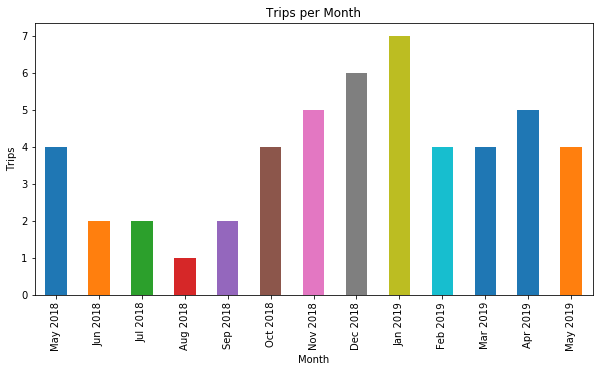

In [12]:
# Question: How many trips per month for the past year
trips = core[core.index > last_year].groupby(pd.Grouper(freq='M'))['Freq-Trip'].count()
trips.index = trips.index.strftime("%b %Y")
ax_trips = trips.plot.bar()
ax_trips.set_title('Trips per Month')
ax_trips.set_xlabel('Month')
ax_trips.set_ylabel('Trips')

In [13]:
########################################################################################################
#################### Aisle Heat Map #################### 
########################################################################################################

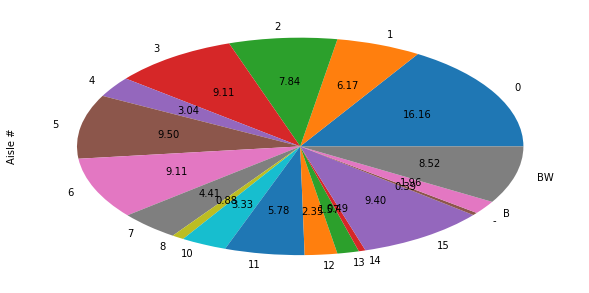

In [14]:
# Question:Which Aisles have the most products? (Heat Map)
core.groupby('Aisle #')['Aisle #'].count().plot.pie(autopct='%1.2f')

In [15]:
########################################################################################################
#################### Category Breakdown #################### 
########################################################################################################

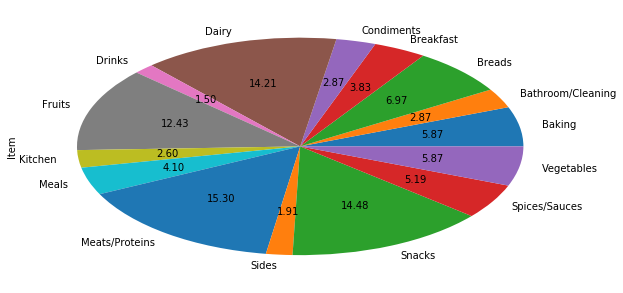

In [16]:
# Question: What category is more frequently bought
cat = core[core.index > '2018-10'].groupby('Category')['Item'].count()
cat.plot.pie(autopct='%1.2f')

In [17]:
########################################################################################################
#################### Last Month's Category Breakdown #################### 
########################################################################################################

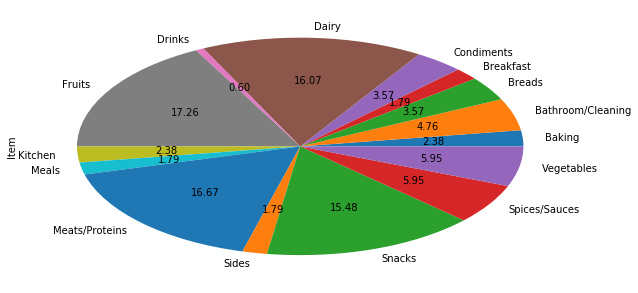

In [18]:
lmonth_cat = core[core.index > last_month].groupby('Category')['Item'].count()
# cat = cat.reset_index(level=[1, 3]).sort_values(by='Freq-Item', ascending=True)
lmonth_cat.plot.pie(autopct='%1.2f')

In [19]:
########################################################################################################
#################### Aisle List #################### 
########################################################################################################

In [20]:
aisle_list = core.copy()
# aisle_list.head()
# aisles = aisle_list['Aisle #'].unique()
# aisles_desc = aisle_list['Aisle Desc'].unique()
# aisles_desc
aisle_list1 = aisle_list.groupby(['Item', 'Category', 'Aisle #', 'Aisle Desc'])['Item'].max().T

# aisle_list = aisle_list.unstack(level=[0, 1])
aisle_list1.head()




Item           Category           Aisle #  Aisle Desc      
Alfredo Sauce  Spices/Sauces      5        Pasta/Rice          Alfredo Sauce
Allergy Tabs   Bathroom/Cleaning  12       Bathroom             Allergy Tabs
Almond Milk    Dairy              15       Dairy Products        Almond Milk
Aluminum Foil  Kitchen            10       Candy/Picnic        Aluminum Foil
Avocado        Fruits             0        Vegetables/Fruit          Avocado
Name: Item, dtype: object

In [21]:
########################################################################################################
#################### Save to Excel Workbook #################### 
########################################################################################################

In [22]:
# Export back into Excel Spreadsheet
# Open Existing Excel book
book = load_workbook(money)
# Rewrite existing sheets (so not to lose any info)
writer = pd.ExcelWriter(money, engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

# Write df to excel workbook under new sheet name
month_list.to_excel(writer, sheet_name='GroceryList')
aisle_list1.to_excel(writer, sheet_name='AisleList-T')


writer.save()
writer.close()



# Predict Grocery List